   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


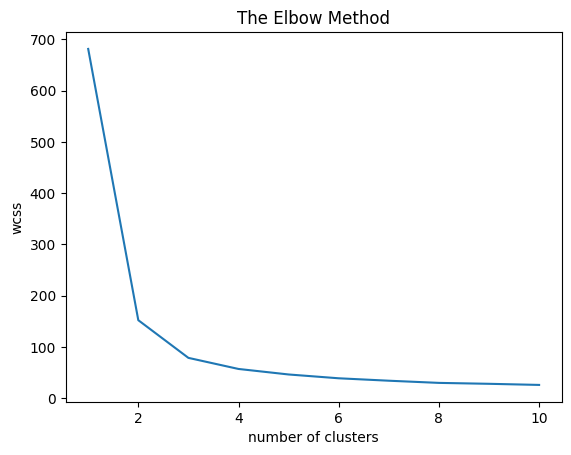

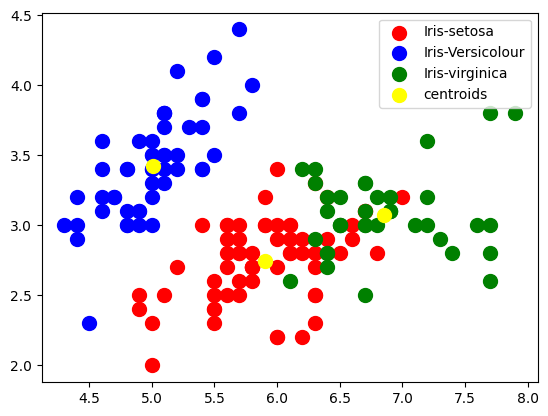

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.head())
print(iris_df.info())

#find the optimal no of k
x= iris_df.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters= i ,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#absorb the elbow point
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

#obtained value of k is 3

kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(x)

#visualising the cluster
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='Iris-Versicolour')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='Iris-virginica')

#plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend()
plt.show()